In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [14]:
# Import data
obs_A = pd.read_parquet('../../../preprocessing/data/obs_A.parquet').drop(columns='date_forecast')
obs_B = pd.read_parquet('../../../preprocessing/data/obs_B.parquet').drop(columns='date_forecast')
obs_C = pd.read_parquet('../../../preprocessing/data/obs_C.parquet').drop(columns='date_forecast')
est_A = pd.read_parquet('../../../preprocessing/data/est_A.parquet').drop(columns='date_forecast')
est_B = pd.read_parquet('../../../preprocessing/data/est_B.parquet').drop(columns='date_forecast')
est_C = pd.read_parquet('../../../preprocessing/data/est_C.parquet').drop(columns='date_forecast')
test_A = pd.read_parquet('../../../preprocessing/data/test_A.parquet').drop(columns='date_forecast')
test_B = pd.read_parquet('../../../preprocessing/data/test_B.parquet').drop(columns='date_forecast')
test_C = pd.read_parquet('../../../preprocessing/data/test_C.parquet').drop(columns='date_forecast')

obs_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29624 entries, 0 to 29623
Data columns (total 84 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   pv_measurement                                    29624 non-null  float64
 1   clear_sky_rad:W                                   29624 non-null  float32
 2   clear_sky_energy_1h:J                             29624 non-null  float32
 3   diffuse_rad:W                                     29624 non-null  float32
 4   diffuse_rad_1h:J                                  29624 non-null  float32
 5   direct_rad:W                                      29624 non-null  float32
 6   direct_rad_1h:J                                   29624 non-null  float32
 7   effective_cloud_cover:p                           29624 non-null  float32
 8   wind_temp_interaction                             29624 non-null  float32
 9   sun_elevation:d  

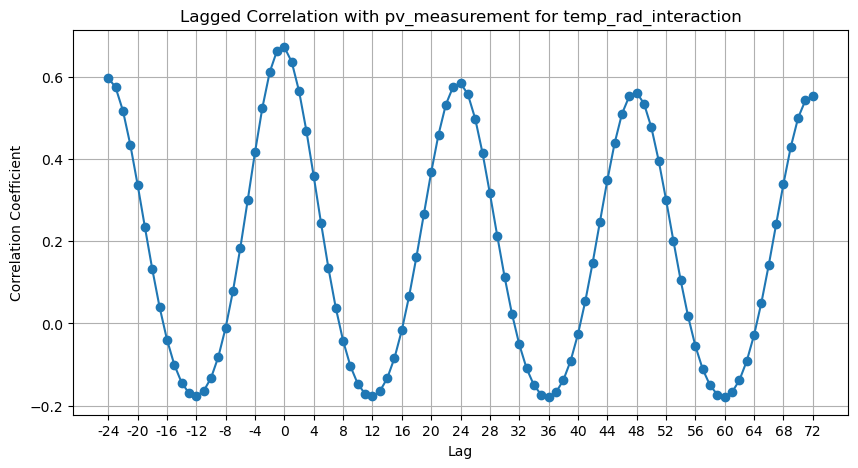

In [15]:
# Number of lags to check
min_lag = -24
max_lag = 72
lag_corrs = []
data = pd.concat([obs_A, est_A, obs_B, est_B, obs_C, est_C], axis=0)
feature = 'temp_rad_interaction'

# Calculate correlation for each lag
for lag in range(min_lag, max_lag + 1):
    lagged_series = data[feature].shift(lag)  # Notice the negative sign for reverse shifting
    corr = lagged_series.corr(data['pv_measurement'])
    lag_corrs.append(corr)

# Plotting the lagged correlations
plt.figure(figsize=(10, 5))
plt.plot(range(min_lag, max_lag + 1), lag_corrs, marker='o')

# Adding labels and title
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.title(f'Lagged Correlation with pv_measurement for {feature}')

# Adjust the x-ticks to include the negative lags as well
# Make sure the ticks are correctly spaced throughout the lag range.
xticks = list(range(min_lag, max_lag + 1, 4))  # for example, 12 can be changed for finer resolution
plt.xticks(xticks, xticks)  # Sets the positions and labels of the x-ticks.

plt.grid(True)

# Show the plot
plt.show()


# Lagged features optimums

- msl_pressure:hPa +3h
- sfc_pressure:hPa +8h
- t_1000hPa:K +4h
- dew_or_rime:idx +11h
- relative_humidity_1000hPa:p -3h
- wind_vector_magnitude +8h
- sun_azimuth:d +7h
- temp_dewpoint_diff -4h
- dew_point_2m:K +19h (weak)
- visibility:m -2h (weak)
